In \[1\]:

    # import the required libraries.
    import matplotlib
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline

In \[2\]:

    #load the housing data 
    from sklearn.datasets import load_boston
    boston_data = load_boston()
    print(boston_data['DESCR'])

    C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

        The Boston housing prices dataset has an ethical problem. You can refer to
        the documentation of this function for further details.

        The scikit-learn maintainers therefore strongly discourage the use of this
        dataset unless the purpose of the code is to study and educate about
        ethical issues in data science and machine learning.

        In this special case, you can fetch the dataset from the original
        source::

            import pandas as pd
            import numpy as np


            data_url = "http://lib.stat.cmu.edu/datasets/boston"
            raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
            data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
            target = raw_df.values[1::2, 2]

        Alternative datasets include the California housing dataset (i.e.
        :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
        dataset. You can load the datasets as follows::

            from sklearn.datasets import fetch_california_housing
            housing = fetch_california_housing()

        for the California housing dataset and::

            from sklearn.datasets import fetch_openml
            housing = fetch_openml(name="house_prices", as_frame=True)

        for the Ames housing dataset.
        
      warnings.warn(msg, category=FutureWarning)

    .. _boston_dataset:

    Boston house prices dataset
    ---------------------------

    **Data Set Characteristics:**  

        :Number of Instances: 506 

        :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

        :Attribute Information (in order):
            - CRIM     per capita crime rate by town
            - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
            - INDUS    proportion of non-retail business acres per town
            - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
            - NOX      nitric oxides concentration (parts per 10 million)
            - RM       average number of rooms per dwelling
            - AGE      proportion of owner-occupied units built prior to 1940
            - DIS      weighted distances to five Boston employment centres
            - RAD      index of accessibility to radial highways
            - TAX      full-value property-tax rate per $10,000
            - PTRATIO  pupil-teacher ratio by town
            - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
            - LSTAT    % lower status of the population
            - MEDV     Median value of owner-occupied homes in $1000's

        :Missing Attribute Values: None

        :Creator: Harrison, D. and Rubinfeld, D.L.

    This is a copy of UCI ML housing dataset.
    https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


    This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

    The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
    prices and the demand for clean air', J. Environ. Economics & Management,
    vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
    ...', Wiley, 1980.   N.B. Various transformations are used in the table on
    pages 244-261 of the latter.

    The Boston house-price data has been used in many machine learning papers that address regression
    problems.   
         
    .. topic:: References

       - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
       - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

In \[3\]:

    # take the boston data
    data = boston_data['data']
    # we will only work with two of the features: INDUS and RM
    x_input = data[:, [2,5]]
    y_target = boston_data['target']

In \[4\]:

    # Individual plots for the two features:
    plt.title('Industrialness vs Med House Price')
    plt.scatter(x_input[:, 0], y_target)
    plt.xlabel('Industrialness')
    plt.ylabel('Med House Price')
    plt.show()

    plt.title('Avg Num Rooms vs Med House Price')
    plt.scatter(x_input[:, 1], y_target)
    plt.xlabel('Avg Num Rooms')
    plt.ylabel('Med House Price')
    plt.show()

![](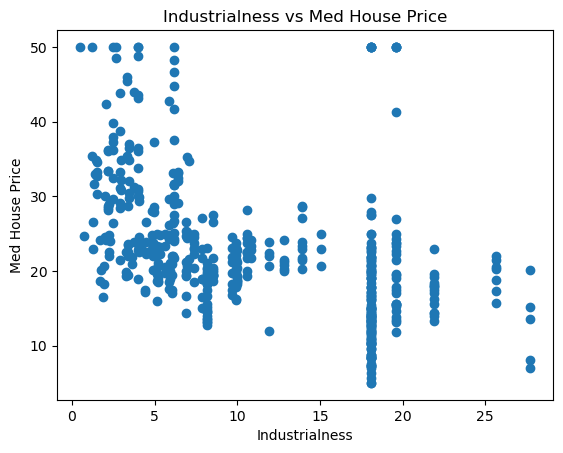%0A)

![](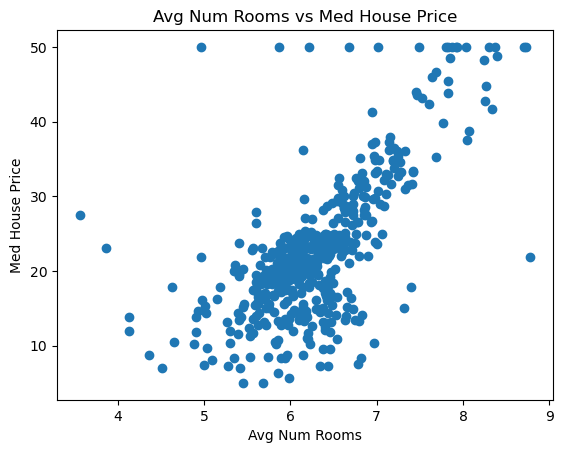%0A)

In \[5\]:

    # Defining the Cost Function
    def cost(w1, w2, b, X, t):
        '''
        Evaluate the cost function in a non-vectorized manner for 
        inputs `X` and targets `t`, at weights `w1`, `w2` and `b`.
        '''
        # TODO: write this!
        costs = 0
        for i in range(len(t)):
            y_i = w1 * X[i, 0] + w2 * X[i, 1] + b
            t_i = t[i]
            costs += 0.5 * (y_i - t_i) ** 2
        return costs / len(t)

In \[6\]:

    #cost for this hypothesis...
    cost(3, 5, 20, x_input, y_target)

Out\[6\]:

    2241.1239166749006

In \[7\]:

    #higher than this one:
    cost(3, 5, 0, x_input, y_target)

Out\[7\]:

    1195.1098850543478

In \[8\]:

    #Vectorizing the cost function
    def cost_vectorized(w1, w2, b, X, t):
        '''
        Evaluate the cost function in a vectorized manner for 
        inputs `X` and targets `t`, at weights `w1`, `w2` and `b`.
        '''
        # TODO: write this!
        N = len(y_target)
        w = np.array([w1, w2])
        y = np.dot(X, w) + b * np.ones(N)
        return np.sum((y - t)**2) / (2.0 * N)

In \[9\]:

    #We can check that the vectorized code provides the same answers as the non-vectorized code:
    # TODO: write this!
    cost_vectorized(3, 5, 20, x_input, y_target)

Out\[9\]:

    2241.1239166749015

In \[10\]:

    # TODO: write this!
    cost_vectorized(3, 5, 0, x_input, y_target)

Out\[10\]:

    1195.1098850543478

In \[11\]:

    #Comparing speed of the vectorized vs unvectorized code
    import time
    t0 = time.time()
    print(cost(4, 5, 20, x_input, y_target))
    t1 = time.time()
    print(t1 - t0)
    t0 = time.time()
    print(cost_vectorized(4, 5, 20, x_input, y_target))
    t1 = time.time()
    print(t1 - t0)

    3182.406341674902
    0.0
    3182.4063416749013
    0.0

In \[12\]:

    # add an extra feature (column in the input) that are just all ones
    x_in = np.concatenate([x_input, np.ones([np.shape(x_input)[0], 1])], axis=1)
    x_in

Out\[12\]:

    array([[ 2.31 ,  6.575,  1.   ],
           [ 7.07 ,  6.421,  1.   ],
           [ 7.07 ,  7.185,  1.   ],
           ...,
           [11.93 ,  6.976,  1.   ],
           [11.93 ,  6.794,  1.   ],
           [11.93 ,  6.03 ,  1.   ]])

In \[13\]:

    def solve_exactly(X, t):
        '''
        Solve linear regression exactly. (fully vectorized)
        
        Given `X` - NxD matrix of inputs
              `t` - target outputs
        Returns the optimal weights as a D-dimensional vector
        '''
        # TODO: write this!
        N, D = np.shape(X)
        A = np.matmul(X.T, X)
        c = np.dot(X.T, t)
        return np.matmul(np.linalg.inv(A), c)

In \[14\]:

    solve_exactly(x_in, y_target)

Out\[14\]:

    array([ -0.33471389,   7.82205511, -22.89831573])

In \[15\]:

    # In real life we don't want to code it directly
    np.linalg.lstsq(x_in, y_target)

    C:\Users\Madarasinghe\AppData\Local\Temp\ipykernel_15476\3140637725.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
    To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
      np.linalg.lstsq(x_in, y_target)

Out\[15\]:

    (array([ -0.33471389,   7.82205511, -22.89831573]),
     array([19807.614505]),
     3,
     array([318.75354429,  75.21961717,   2.10127199]))

In \[16\]:

    #Gradient Function and Gradient Descent
    # Vectorized gradient function
    def gradfn(weights, X, t):
        '''
        Given `weights` - a current "Guess" of what our weights should be
              `X` - matrix of shape (N,D) of input features
              `t` - target y values
        Return gradient of each weight evaluated at the current value
        '''
        # TODO: write this!
        N, D = np.shape(X)
        y_pred = np.matmul(X, weights)
        error = y_pred - t
        return np.matmul(np.transpose(x_in), error) / float(N)

In \[17\]:

    def solve_via_gradient_descent(X, t, print_every=1,
                                   niter=5, alpha=0.005):
        '''
        Given `X` - matrix of shape (N,D) of input features
              `t` - target y values
        Solves for linear regression weights.
        Return weights after `niter` iterations.
        '''
        # TODO: write this!
        N, D = np.shape(X)
        # initialize all the weights to zeros
        w = np.zeros([D])
        for k in range(niter):
            dw = gradfn(w, X, t)
            w = w - alpha*dw
            if k % print_every == 0:
                print('Weight after %d iteration: %s' % (k, str(w)))
        return w

In \[18\]:

    solve_via_gradient_descent( X=x_in, t=y_target)

    Weight after 0 iteration: [1.10241186 0.73047508 0.11266403]
    Weight after 1 iteration: [1.00724206 0.93594759 0.14042431]
    Weight after 2 iteration: [0.92192637 1.13187259 0.16688862]
    Weight after 3 iteration: [0.84136295 1.31684417 0.19181474]
    Weight after 4 iteration: [0.76530428 1.49148244 0.21528991]

Out\[18\]:

    array([0.76530428, 1.49148244, 0.21528991])

In \[19\]:

    np.linalg.lstsq(x_in, y_target)

    C:\Users\Madarasinghe\AppData\Local\Temp\ipykernel_15476\1328349989.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
    To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
      np.linalg.lstsq(x_in, y_target)

Out\[19\]:

    (array([ -0.33471389,   7.82205511, -22.89831573]),
     array([19807.614505]),
     3,
     array([318.75354429,  75.21961717,   2.10127199]))

In \[ \]: